### Importing necessary modules for data extraction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loaded the dataset as dataframe using pandas

In [3]:
telco = pd.read_csv('./dataset.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking the shape and missing values

In [5]:
telco.shape

(7043, 21)

In [4]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Dropping the CustomerID
- CustomerID is a randomly generated string that has no conversion opportunity.
- Also this feature has no significance over any feature.

In [6]:
telco.drop('customerID', inplace=True,axis=1)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking the data type of the features of the dataset

In [7]:
telco.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Encoding Features
- The following features have a data type of object which cannot be used.
- We have encoded the feature values from object to a numerical value

In [8]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

telco['gender']         = enc.fit_transform(telco['gender'])
telco['Dependents']     = enc.fit_transform(telco['Dependents'])
telco['Partner']        = enc.fit_transform(telco['Partner'])
telco['PhoneService']   = enc.fit_transform(telco['PhoneService'])
telco['MultipleLines']  = enc.fit_transform(telco['MultipleLines'])
telco['InternetService'] = enc.fit_transform(telco['InternetService'])
telco['OnlineSecurity'] = enc.fit_transform(telco['OnlineSecurity'])
telco['OnlineBackup']   = enc.fit_transform(telco['OnlineBackup'])
telco['DeviceProtection'] = enc.fit_transform(telco['DeviceProtection'])
telco['TechSupport']    = enc.fit_transform(telco['TechSupport'])
telco['StreamingTV']    = enc.fit_transform(telco['StreamingTV'])
telco['StreamingMovies'] = enc.fit_transform(telco['StreamingMovies'])
telco['Contract']       = enc.fit_transform(telco['Contract'])
telco['PaperlessBilling'] = enc.fit_transform(telco['PaperlessBilling'])
telco['PaymentMethod']  = enc.fit_transform(telco['PaymentMethod'])
telco['Churn']          = enc.fit_transform(telco['Churn'])
telco['TotalCharges']   = pd.to_numeric(telco['TotalCharges'],errors='coerce')
telco['Churn']          = enc.fit_transform(telco['Churn'])

telco.head()   ### SHowing the result of change
     

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Test Train Data Splitting

In [9]:
from sklearn.model_selection import train_test_split

x = telco.iloc[:, :-2]
y = telco.iloc[0:, -1]
print(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [10]:
telco.dropna(inplace=True)
telco.dtypes
# telco.isnull().sum()

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [11]:
print("per-feature minimum before scaling:\n {}".format(x_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(x_train.max(axis=0)))

per-feature minimum before scaling:
 gender               0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
tenure               0.00
PhoneService         0.00
MultipleLines        0.00
InternetService      0.00
OnlineSecurity       0.00
OnlineBackup         0.00
DeviceProtection     0.00
TechSupport          0.00
StreamingTV          0.00
StreamingMovies      0.00
Contract             0.00
PaperlessBilling     0.00
PaymentMethod        0.00
MonthlyCharges      18.25
dtype: float64
per-feature maximum before scaling:
 gender                1.0
SeniorCitizen         1.0
Partner               1.0
Dependents            1.0
tenure               72.0
PhoneService          1.0
MultipleLines         2.0
InternetService       2.0
OnlineSecurity        2.0
OnlineBackup          2.0
DeviceProtection      2.0
TechSupport           2.0
StreamingTV           2.0
StreamingMovies       2.0
Contract              2.0
PaperlessBilling      1.0
PaymentMethod         3.0
M

## Scalling the retrieved features
- We will be using MinMaxScaler algorithm here

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled = scaler.transform(x_train)
print("per-feature minimum after scaling:\n {}".format(
    x_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    x_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

print("Train set accuracy: {:.2f}".format(knn.score(x_train, y_train)))
print("Test set accuracy: {:.2f}".format(knn.score(x_test, y_test)))

knnTrain = knn.score(x_train, y_train)
knnTest  = knn.score(x_test, y_test)

Train set accuracy: 0.84
Test set accuracy: 0.78


### Confusion Matrix for KNN Classifier

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split the dataset and fitting the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
knn.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(x_test)

# Creating confusion matrix for logistic regression
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)


[[1346  193]
 [ 282  292]]


### Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

tree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

DTTrain = tree.score(x_train, y_train)
DTTest  = tree.score(x_test, y_test)

Accuracy on training set: 0.998
Accuracy on test set: 0.723


### Confusion Matrix for Decision Tree

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split the dataset and fitting the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tree.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = tree.predict(x_test)

# Creating confusion matrix for Decision Tree
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)


[[1246  293]
 [ 287  287]]


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf = LogisticRegression(solver='liblinear')
clf.fit(x_train, y_train)

# Print the accuracy from the testing data.
print("Accuracy on test set: {}".format(clf.score(x_test, y_test)))
print("Accuracy on train set: {}".format(clf.score(x_train, y_train)))

LRTrain = clf.score(x_train, y_train)
LRTest  = clf.score(x_test, y_test)


Accuracy on test set: 0.8097491717936584
Accuracy on train set: 0.8020283975659229


### Confusion Matrix for Logistic Regression

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split the dataset and fitting the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(x_test)

# Creating confusion matrix for logistic regression
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)


[[1386  153]
 [ 249  325]]


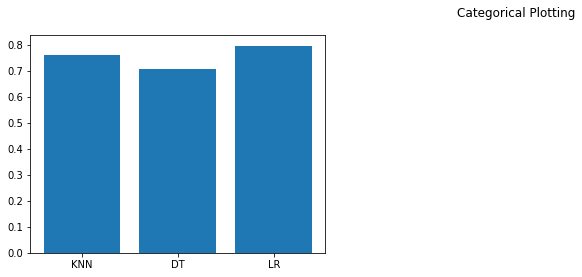

KNN → 0.7597156398104266%  DT → 0.7075829383886256%  LR → 0.795734597156398%


In [102]:
#import matplotlib.pyplot as plt

names = ['KNN', 'DT', 'LR']
values = [knnTest, DTTest, LRTest]

plt.figure(figsize=(18, 4))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Categorical Plotting')
plt.show()
print("KNN → {}%  DT → {}%  LR → {}%".format(knnTest, DTTest, LRTest))

### Applying Bagging

In [85]:
from sklearn.ensemble import BaggingClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

logreg  = LogisticRegression(solver='liblinear')
dectree = DecisionTreeClassifier()
knn     = KNeighborsClassifier()


bagging_logreg = BaggingClassifier(base_estimator=logreg, n_estimators=10, random_state=42)
bagging_logreg.fit(x_train, y_train)

bagging_decisiontree = BaggingClassifier(base_estimator=dectree, n_estimators=10, random_state=42)
bagging_decisiontree.fit(x_train, y_train)

knn_bagging = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)
knn_bagging.fit(x_train, y_train)

bagging = [bagging_logreg.score(x_test, y_test), bagging_decisiontree.score(x_test, y_test), knn_bagging.score(x_test, y_test)]

print("After Bagging Logistic Regression Accuracy :{} → {}" .format(LRTest, bagging_logreg.score(x_test, y_test)))
print("After Bagging Decision Tree Accuracy :{} → {}" .format(DTTest, bagging_decisiontree.score(x_test, y_test)))
print("After Bagging KNNeighbour Accuracy :{} → {}" .format(knnTest, knn_bagging.score(x_test, y_test)))


After Bagging Logistic Regression Accuracy :0.795734597156398 → 0.7985781990521327
After Bagging Decision Tree Accuracy :0.7075829383886256 → 0.7767772511848341
After Bagging KNNeighbour Accuracy :0.7597156398104266 → 0.7625592417061612


### Applying Adaboost 
- KNN is not supported for AdaBoost because it does not support sample weights

In [82]:
from sklearn.ensemble import AdaBoostClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


adaboost_logreg = AdaBoostClassifier(base_estimator=logreg, n_estimators=10, random_state=42)
adaboost_logreg.fit(x_train, y_train)

adaboost_decTree = AdaBoostClassifier(base_estimator=dectree, n_estimators=10, random_state=42)
adaboost_decTree.fit(x_train, y_train)

### KNN is not supported for AdaBoost because it does not support sample weights ###
# adaboost_knn = AdaBoostClassifier(base_estimator=knn, n_estimators=10, random_state=42)
# adaboost_knn.fit(x_train, y_train)

adaboost = [adaboost_logreg.score(x_test, y_test), adaboost_decTree.score(x_test, y_test), 0.0000]

print("After Adaboosting Logistic Regression Accuracy :{} → {}" .format(LRTest, adaboost_logreg.score(x_test, y_test)))
print("After Adaboosting Decision Tree Accuracy :{} → {}" .format(DTTest, adaboost_decTree.score(x_test, y_test)))
#print("After Adaboosting KNNeighbour Accuracy :{} → {}" .format(knnTest, adaboost_knn.score(x_test, y_test)))

After Bagging Logistic Regression Accuracy :0.795734597156398 → 0.7881516587677725
After Bagging Decision Tree Accuracy :0.7075829383886256 → 0.7426540284360189


### Applying Stacking

In [83]:
from sklearn.ensemble import StackingClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


stacking_logreg = StackingClassifier(estimators=[('lr', logreg), ('dt', dectree), ('knn', knn)], final_estimator=LogisticRegression())
stacking_logreg.fit(x_train, y_train)

stacking_decTree = StackingClassifier(estimators=[('lr', logreg), ('dt', dectree), ('knn', knn)], final_estimator=DecisionTreeClassifier())
stacking_decTree.fit(x_train, y_train)

stacking_knn = StackingClassifier(estimators=[('lr', logreg), ('dt', dectree), ('knn', knn)], final_estimator=KNeighborsClassifier())
stacking_knn.fit(x_train, y_train)

stacking = [stacking_logreg.score(x_test, y_test), stacking_decTree.score(x_test, y_test), stacking_knn.score(x_test, y_test)]

print("After Bagging Logistic Regression Accuracy : {} → {}" .format(LRTest, stacking_logreg.score(x_test, y_test)))
print("After Bagging Decision Tree Accuracy : {} → {}" .format(DTTest, stacking_decTree.score(x_test, y_test)))
print("After Bagging KNNeighbour Accuracy : {} → {}" .format(knnTest, stacking_knn.score(x_test, y_test)))

After Bagging Logistic Regression Accuracy : 0.795734597156398 → 0.7966824644549763
After Bagging Decision Tree Accuracy : 0.7075829383886256 → 0.7104265402843601
After Bagging KNNeighbour Accuracy : 0.7597156398104266 → 0.7582938388625592


### Logistic Regression after Adaboosting, Bagging and Stacking

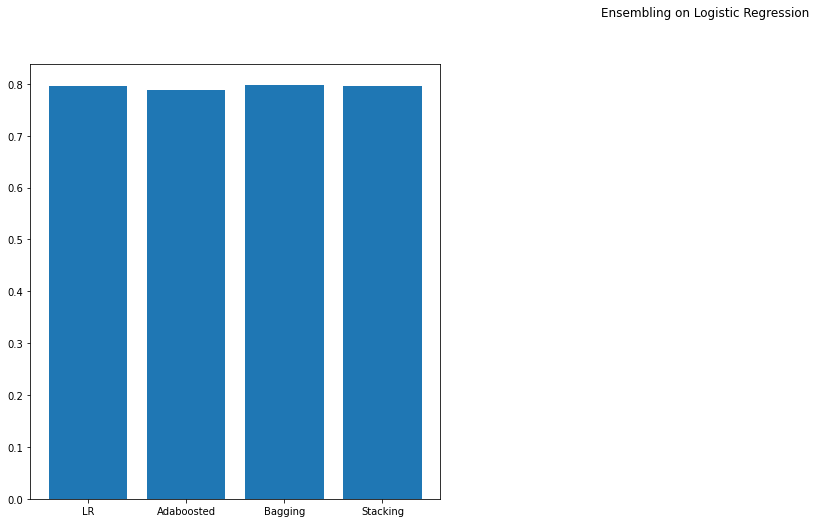

After Logistic Regression Accuracy :79.5734597156398%
After Adaboosting Logistic Regression Accuracy :79.5734597156398% → 78.81516587677724%
After Bagging Logistic Regression Accuracy :79.5734597156398% → 79.85781990521326%
After Stacking Logistic Regression Accuracy:79.5734597156398% → 79.66824644549763%


In [93]:

names = ['LR', 'Adaboosted', 'Bagging', 'Stacking']
values = [LRTest, adaboost[0], bagging[0], stacking[0]]

plt.figure(figsize=(25, 5))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Ensembling on Logistic Regression')
plt.show()

print("After Logistic Regression Accuracy :{}%" .format(LRTest*100))
print("After Adaboosting Logistic Regression Accuracy :{}% → {}%" .format(LRTest*100, adaboost[0]*100))
print("After Bagging Logistic Regression Accuracy :{}% → {}%" .format(LRTest*100, bagging[0]*100))
print("After Stacking Logistic Regression Accuracy:{}% → {}%" .format(LRTest*100, stacking[0]*100))

### KNN After Adaboosting, Bagging and Stacking

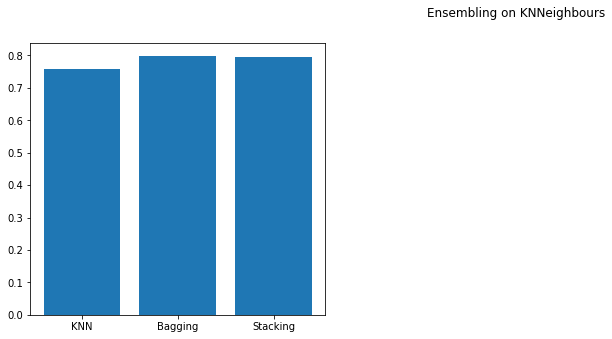

After KNNeighbours Accuracy :75.97156398104265%
After Bagging KNNeighbours Accuracy :75.97156398104265% → 76.25592417061611%
After Stacking KNNeighbours Accuracy:75.97156398104265% → 75.82938388625593%


In [100]:
names = ['KNN', 'Bagging', 'Stacking']
values = [knnTest, bagging[0], stacking[0]]

plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Ensembling on KNNeighbours')
plt.show()

print("After KNNeighbours Accuracy :{}%" .format(knnTest*100))
print("After Bagging KNNeighbours Accuracy :{}% → {}%" .format(knnTest*100, bagging[2]*100))
print("After Stacking KNNeighbours Accuracy:{}% → {}%" .format(knnTest*100, stacking[2]*100))

### Decision Tree After Adaboosting, Bagging, Stacking

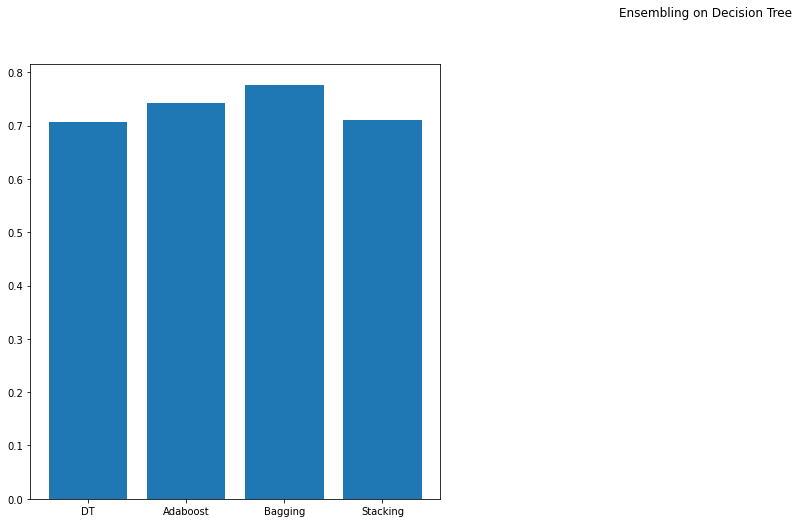

After Decision Tree Accuracy :70.75829383886256%
After Adaboosting Decision Tree Accuracy :70.75829383886256% → 74.26540284360189%
After Bagging Decision Tree Accuracy :70.75829383886256% → 77.67772511848341%
After Stacking Decision Tree Accuracy:70.75829383886256% → 71.04265402843602%


In [98]:
names = ['DT', 'Adaboost', 'Bagging', 'Stacking']
values = [DTTest, adaboost[1], bagging[1], stacking[1]]

plt.figure(figsize=(25, 8))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Ensembling on Decision Tree')
plt.show()

print("After Decision Tree Accuracy :{}%" .format(DTTest*100))
print("After Adaboosting Decision Tree Accuracy :{}% → {}%" .format(DTTest*100, adaboost[1]*100))
print("After Bagging Decision Tree Accuracy :{}% → {}%" .format(DTTest*100, bagging[1]*100))
print("After Stacking Decision Tree Accuracy:{}% → {}%" .format(DTTest*100, stacking[1]*100))

### add confusion matrix for → knn, dt, lr